#**Tugas Besar Machine Learning**
## CLUSTERING TINGKAT GENANGAN AIR DI RAYON SURABAYA MENGGUNAKAN ALGORITMA K-MEANS
#####Kelompok 1
#####Evyra Rizki Safitri (IT-02-02 - 1202190015)
#####Fitria Rahma Wulandari (IT-02-02 - 1202190045)
#####Annisa Ainin Fadilah (IT-02-02 - 1202190059)
#####Dafa Septiandri Dwinanda Prabowo (IT-02-02 - 1202192033)

**Identifikasi masalah dan Pernyataan masalah yang ingin diselesaikan**

Permasalahan persebaran genangan air Kota Surabaya

**Pre-Processing Data**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
dataset=pd.read_csv("/content/drive/My Drive/Machine Learning/data genangan air Surabaya.csv")
dataset2=pd.read_csv("/content/drive/My Drive/Machine Learning/data-genangan-baru2.csv")
dataset

,_id,Lokasi,Kecamatan,Kelurahan,Rayon,Luas genangan,Tinggi genangan,Lama genangan,Skor Luas Genangan,Skor Tinggi Genangan,Skor Lama Genangan
0,1,Jl. Pakis Agosari (Yamaha),Dukuh Pakis,Dukuh Pakis,Rayon Wiyung,10.800000,10,40,100,25,25
1,2,Jl. Mayjend Sungkono - Darmo Park I,Dukuh Pakis,Dukuh Pakis,Rayon Wiyung,0.816236,25,58,75,50,25
2,3,Jl. Mayjend Sungkono (Pom Bensin),Dukuh Pakis,Dukuh Pakis,Rayon Wiyung,0.509047,15,16,75,50,0
3,4,Kp. Kebraon,Karangpilang,Warugunung,Rayon Wiyung,0.785111,10,40,75,25,25
4,5,Jl. Lakar Santri RW.001,Lakarsantri,Bangkingan,Rayon Wiyung,0.749717,30,16,75,50,0
...,...,...,...,...,...,...,...,...,...,...,...
239,240,Jl. Kanwa,WONOKROMO,DARMO,Rayon Genteng,0.334177,9,3,50,25,0
240,241,Per. Rungkut Harapan,Rungkut,Rungkut Kidul,Rayon Jambangan,0.851371,9,3,75,25,0
241,242,TANJUNGSARI I,SUKOMANUNGGAL,TANJUNGSARI,Rayon Tandes,19.980000,9,15,100,25,0
242,243,Jl. Karangrejo,Wonokromo,Wonokromo,Rayon Jambangan,15.830000,9,20,100,25,0


In [4]:
dataset[['Rayon', 'Skor Luas Genangan', 'Skor Tinggi Genangan', 'Skor Lama Genangan']]

,Rayon,Skor Luas Genangan,Skor Tinggi Genangan,Skor Lama Genangan
0,Rayon Wiyung,100,25,25
1,Rayon Wiyung,75,50,25
2,Rayon Wiyung,75,50,0
3,Rayon Wiyung,75,25,25
4,Rayon Wiyung,75,50,0
...,...,...,...,...
239,Rayon Genteng,50,25,0
240,Rayon Jambangan,75,25,0
241,Rayon Tandes,100,25,0
242,Rayon Jambangan,100,25,0


In [5]:
dataset2

,_id,Rayon,Luas genangan,Tinggi genangan,Lama genangan,Skor_Luas_Genangan,Skor_Tinggi_Genangan,Skor_Lama_Genangan
0,1,1,108.000.000.000,10,40,100,25,25
1,2,1,816.236.000.000,25,58,75,50,25
2,3,1,509.047.000.000,15,16,75,50,0
3,4,1,785.111.000.000,10,40,75,25,25
4,5,1,749.717.000.000,30,16,75,50,0
...,...,...,...,...,...,...,...,...
239,240,5,334.177.000.000,9,3,50,25,0
240,241,3,851.371.000.000,9,3,75,25,0
241,242,2,199.800.000.000,9,15,100,25,0
242,243,3,158.300.000.000,9,20,100,25,0


In [6]:
dataset.head()

,_id,Lokasi,Kecamatan,Kelurahan,Rayon,Luas genangan,Tinggi genangan,Lama genangan,Skor Luas Genangan,Skor Tinggi Genangan,Skor Lama Genangan
0,1,Jl. Pakis Agosari (Yamaha),Dukuh Pakis,Dukuh Pakis,Rayon Wiyung,10.800000,10,40,100,25,25
1,2,Jl. Mayjend Sungkono - Darmo Park I,Dukuh Pakis,Dukuh Pakis,Rayon Wiyung,0.816236,25,58,75,50,25
2,3,Jl. Mayjend Sungkono (Pom Bensin),Dukuh Pakis,Dukuh Pakis,Rayon Wiyung,0.509047,15,16,75,50,0
3,4,Kp. Kebraon,Karangpilang,Warugunung,Rayon Wiyung,0.785111,10,40,75,25,25
4,5,Jl. Lakar Santri RW.001,Lakarsantri,Bangkingan,Rayon Wiyung,0.749717,30,16,75,50,0


In [7]:
dataset.isna().sum()

_id                     0
Lokasi                  0
Kecamatan               0
Kelurahan               0
Rayon                   0
Luas genangan           0
Tinggi genangan         0
Lama genangan           0
Skor Luas Genangan      0
Skor Tinggi Genangan    0
Skor Lama Genangan      0
dtype: int64

In [8]:
dataset.duplicated().sum()

0

In [9]:
#type dataset
dataset.dtypes

_id                       int64
Lokasi                   object
Kecamatan                object
Kelurahan                object
Rayon                    object
Luas genangan           float64
Tinggi genangan           int64
Lama genangan             int64
Skor Luas Genangan        int64
Skor Tinggi Genangan      int64
Skor Lama Genangan        int64
dtype: object

In [10]:
dataset.info

<bound method DataFrame.info of      _id                               Lokasi      Kecamatan      Kelurahan  \
0      1           Jl. Pakis Agosari (Yamaha)    Dukuh Pakis    Dukuh Pakis   
1      2  Jl. Mayjend Sungkono - Darmo Park I    Dukuh Pakis    Dukuh Pakis   
2      3    Jl. Mayjend Sungkono (Pom Bensin)    Dukuh Pakis    Dukuh Pakis   
3      4                          Kp. Kebraon   Karangpilang     Warugunung   
4      5              Jl. Lakar Santri RW.001    Lakarsantri     Bangkingan   
..   ...                                  ...            ...            ...   
239  240                            Jl. Kanwa      WONOKROMO          DARMO   
240  241                 Per. Rungkut Harapan        Rungkut  Rungkut Kidul   
241  242                        TANJUNGSARI I  SUKOMANUNGGAL    TANJUNGSARI   
242  243                       Jl. Karangrejo      Wonokromo      Wonokromo   
243  244                       Kp. Tambakdono         Benowo     Tambakdono   

               Rayo

**Eksplorasi data (EDA)**

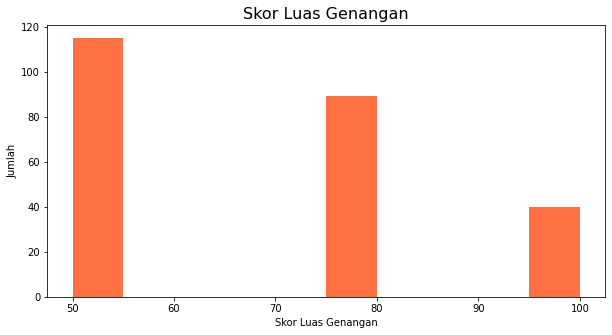

In [11]:
plt.figure(figsize=(10,5))
plt.title("Skor Luas Genangan",fontsize=16)
plt.xlabel ("Skor Luas Genangan",fontsize=10)
plt.ylabel ("Jumlah",fontsize=10)
plt.hist(dataset2['Skor_Luas_Genangan'],color='#FF7043')
plt.show()

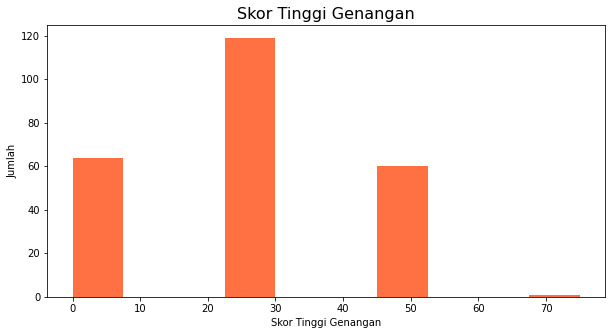

In [12]:
plt.figure(figsize=(10,5))
plt.title("Skor Tinggi Genangan",fontsize=16)
plt.xlabel ("Skor Tinggi Genangan",fontsize=10)
plt.ylabel ("Jumlah",fontsize=10)
plt.hist(dataset2['Skor_Tinggi_Genangan'],color='#FF7043')
plt.show()

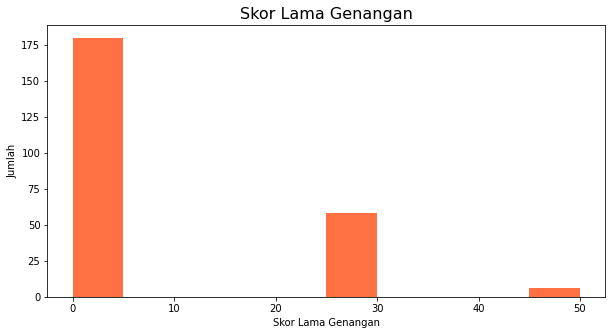

In [13]:
plt.figure(figsize=(10,5))
plt.title("Skor Lama Genangan",fontsize=16)
plt.xlabel ("Skor Lama Genangan",fontsize=10)
plt.ylabel ("Jumlah",fontsize=10)
plt.hist(dataset2['Skor_Lama_Genangan'],color='#FF7043')
plt.show()

**K-MEANS**

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale # Data scaling
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler

In [17]:
array_x=dataset[['Skor Luas Genangan','Skor Tinggi Genangan','Skor Lama Genangan']]

In [18]:
scaler_fit = MinMaxScaler()
scaled_x = scaler_fit.fit_transform(array_x)
scaled_x

array([[1.        , 0.33333333, 0.5       ],
       [0.5       , 0.66666667, 0.5       ],
       [0.5       , 0.66666667, 0.        ],
       [0.5       , 0.33333333, 0.5       ],
       [0.5       , 0.66666667, 0.        ],
       [0.5       , 0.        , 0.        ],
       [1.        , 0.33333333, 0.        ],
       [0.        , 0.33333333, 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.66666667, 0.        ],
       [0.        , 0.66666667, 0.        ],
       [0.        , 0.66666667, 0.        ],
       [0.        , 0.66666667, 0.5       ],
       [0.5       , 0.33333333, 0.5       ],
       [0.5       , 1.        , 1.        ],
       [0.5       , 0.66666667, 0.5       ],
       [0.        , 0.66666667, 0.5       ],
       [1.        , 0.33333333, 0.5       ],
       [0.        , 0.33333333, 0.        ],
       [0.        , 0.33333333, 0.5       ],
       [0.        , 0.66666667, 0.        ],
       [1.        , 0.66666667, 0.        ],
       [0.

In [19]:
kmeans = KMeans(n_clusters=3, random_state=70)

In [20]:
kmeans.fit(scaled_x)

KMeans(n_clusters=3, random_state=70)

In [21]:
print(kmeans.cluster_centers_)

[[ 6.77777778e-01  3.07407407e-01  1.11111111e-02]
 [-4.44089210e-16  2.76729560e-01  6.60377358e-02]
 [ 4.89583333e-01  4.93055556e-01  5.62500000e-01]]


In [22]:
dataset["kluster"]= kmeans.labels_

In [23]:
print(kmeans.labels_)

[2 2 0 2 0 0 0 1 1 1 1 1 2 2 2 2 2 2 1 1 1 0 2 1 1 1 0 0 1 1 1 0 0 1 0 0 0
 0 1 2 2 0 0 0 0 1 2 2 0 1 2 0 0 1 1 0 1 1 1 1 1 0 2 0 1 1 2 1 0 2 1 1 1 0
 0 0 1 0 0 0 1 2 1 2 0 0 2 2 1 1 0 0 1 2 0 2 0 0 2 0 0 1 1 0 1 0 2 2 2 1 1
 1 1 1 2 1 1 0 0 0 1 1 1 1 2 1 0 0 1 2 1 1 1 1 0 1 0 1 2 1 0 1 1 1 0 1 2 2
 1 2 2 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 2 1 1 1 1 1 0 0 0 1 0
 2 0 2 2 0 2 1 2 2 2 1 1 1 2 1 2 1 0 0 2 1 1 0 1 1 2 0 1 1 1 0 1 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0]


In [24]:
print(dataset.kluster)

0      2
1      2
2      0
3      2
4      0
      ..
239    1
240    0
241    0
242    0
243    0
Name: kluster, Length: 244, dtype: int32


In [25]:
print(dataset)

     _id                               Lokasi      Kecamatan      Kelurahan  \
0      1           Jl. Pakis Agosari (Yamaha)    Dukuh Pakis    Dukuh Pakis   
1      2  Jl. Mayjend Sungkono - Darmo Park I    Dukuh Pakis    Dukuh Pakis   
2      3    Jl. Mayjend Sungkono (Pom Bensin)    Dukuh Pakis    Dukuh Pakis   
3      4                          Kp. Kebraon   Karangpilang     Warugunung   
4      5              Jl. Lakar Santri RW.001    Lakarsantri     Bangkingan   
..   ...                                  ...            ...            ...   
239  240                            Jl. Kanwa      WONOKROMO          DARMO   
240  241                 Per. Rungkut Harapan        Rungkut  Rungkut Kidul   
241  242                        TANJUNGSARI I  SUKOMANUNGGAL    TANJUNGSARI   
242  243                       Jl. Karangrejo      Wonokromo      Wonokromo   
243  244                       Kp. Tambakdono         Benowo     Tambakdono   

               Rayon  Luas genangan  Tinggi genanga

In [26]:
x = dataset.iloc[:,8:11] # 1t for rows and second for columns
x

,Skor Luas Genangan,Skor Tinggi Genangan,Skor Lama Genangan
0,100,25,25
1,75,50,25
2,75,50,0
3,75,25,25
4,75,50,0
...,...,...,...
239,50,25,0
240,75,25,0
241,100,25,0
242,100,25,0


In [27]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [28]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([2, 1, 1, 2, 1, 2, 2, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 0, 0, 1, 1,
       1, 1, 1, 1, 2, 2, 0, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 2, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 0, 1, 2, 2, 0, 0, 2, 1, 1, 0, 0, 0, 2, 2, 2, 0, 0,
       1, 0, 1, 2, 1, 0, 0, 1, 2, 1, 1, 1, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1,
       0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 1, 0, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 1, 2, 0, 0, 2,
       0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 1, 1,
       0, 0, 0, 0, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 2, 2, 2, 0, 0, 2, 0, 0, 1, 2, 1, 1, 0, 1, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2,
       2, 2], dtype=int32)

In [29]:
scaler_fit = StandardScaler()
scaled_x = scaler_fit.fit_transform(array_x)
scaled_x

array([[ 1.77785554,  0.01131769,  1.41561697],
       [ 0.41799111,  1.39207624,  1.41561697],
       [ 0.41799111,  1.39207624, -0.56950108],
       [ 0.41799111,  0.01131769,  1.41561697],
       [ 0.41799111,  1.39207624, -0.56950108],
       [ 0.41799111, -1.36944086, -0.56950108],
       [ 1.77785554,  0.01131769, -0.56950108],
       [-0.94187331,  0.01131769, -0.56950108],
       [-0.94187331, -1.36944086, -0.56950108],
       [-0.94187331,  1.39207624, -0.56950108],
       [-0.94187331,  1.39207624, -0.56950108],
       [-0.94187331,  1.39207624, -0.56950108],
       [-0.94187331,  1.39207624,  1.41561697],
       [ 0.41799111,  0.01131769,  1.41561697],
       [ 0.41799111,  2.77283479,  3.40073502],
       [ 0.41799111,  1.39207624,  1.41561697],
       [-0.94187331,  1.39207624,  1.41561697],
       [ 1.77785554,  0.01131769,  1.41561697],
       [-0.94187331,  0.01131769, -0.56950108],
       [-0.94187331,  0.01131769,  1.41561697],
       [-0.94187331,  1.39207624, -0.569

In [59]:
km = KMeans(n_clusters=3)
km

y_predicted = km.fit_predict(dataset[['Skor Luas Genangan','Skor Tinggi Genangan','Skor Lama Genangan']])
y_predicted

dataset['Kelas'] = y_predicted

In [60]:
conditions = [
    (dataset['Kelas']==0),
    (dataset['Kelas']==1),
    (dataset['Kelas']==2)]
choices = ['Tinggi','Sedang','Rendah']
dataset['Kelas'] = np.select(conditions, choices)

In [61]:
sum(dataset['Kelas']=='Tinggi')

53

In [63]:
sum(dataset['Kelas']=='Sedang')

102

In [64]:
sum(dataset['Kelas']=='Rendah')

89

In [62]:
print(dataset.Rayon[dataset['Kelas']=='Tinggi'])

1         Rayon Wiyung
2         Rayon Wiyung
4         Rayon Wiyung
9         Rayon Tandes
10        Rayon Wiyung
11        Rayon Wiyung
12        Rayon Wiyung
14        Rayon Wiyung
15        Rayon Wiyung
16        Rayon Wiyung
20        Rayon Wiyung
22        Rayon Wiyung
23        Rayon Wiyung
24        Rayon Wiyung
25        Rayon Wiyung
32        Rayon Tandes
37        Rayon Tandes
40        Rayon Tandes
43        Rayon Tandes
44        Rayon Tandes
45        Rayon Tandes
46        Rayon Tandes
47        Rayon Tandes
48        Rayon Tandes
56        Rayon Tandes
57        Rayon Tandes
66        Rayon Tandes
70        Rayon Tandes
75        Rayon Tandes
76        Rayon Tandes
81        Rayon Tandes
87     Rayon Jambangan
114       Rayon Gubeng
119       Rayon Gubeng
124       Rayon Gubeng
129       Rayon Gubeng
149       Rayon Gubeng
166       Rayon Gubeng
174      Rayon Genteng
175       Rayon Gubeng
184      Rayon Genteng
188      Rayon Genteng
190      Rayon Genteng
191      Ra